In [1]:
from analysis_SIM_generate_fun import *

# SIM -Demos

In [2]:
######################################
########## SIM -Demos ################
######################################
def SIM_demos():
    import sys

    sys.path.append('.')

    # from utilities import set_rcParams
    # set_rcParams()

    #forward
    data = generate_forward(gene_num=6, alpha=15, beta=20, gamma=18, sample=1000, noise_level=0.5)
    data_g1 = data[data['gene_list']=="simulation000"]
    plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
    plt.show()

    #backward
    data = generate_backward(gene_num=6, alpha=15, beta=10, gamma=12, sample=1000, noise_level=0.2)
    data_g1 = data[data['gene_list']=="simulation000"]
    plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
    plt.show()

    #two stage alpha
    data = generate_onepath(gene_num=6, alpha1=15, alpha2=30, beta1=10, beta2=10, gamma1=12, gamma2=12, path1_pct=99, path2_pct=99, path1_sample=1000, path2_sample=1000, noise_level=0.2)
    data_g1 = data[data['gene_list']=="simulation000"]
    plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
    plt.show()

    #multiple path
    data = generate_multipath(gene_num=6, alpha1=18, alpha2=30, beta1=10, beta2=10, gamma1=12, gamma2=12, path1_pct=99, path2_pct=90, path1_sample=1000, path2_sample=1000, noise_level=0.2)
    data_g1 = data[data['gene_list']=="simulation000"]
    plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
    plt.show()

    #circle: including normal, early switch, and early stop
    data = generate_onepath(gene_num=6, alpha1=15, alpha2=0, beta1=10, beta2=3, gamma1=12, gamma2=4, path1_pct=99, path2_pct=99, path1_sample=1000, path2_sample=1000, noise_level=0.2)
    data_g1 = data[data['gene_list']=="simulation000"]
    plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
    plt.show()

    #float circle (not started from 0,0)
    data = generate_float_circle(gene_num=6, alpha1=15, alpha2=6, beta1=10, beta2=10, gamma1=12, gamma2=12, path1_pct=99, path2_pct=99, path1_sample=1000, path2_sample=1000, noise_level=0.2)
    data_g1 = data[data['gene_list']=="simulation000"]
    plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
    plt.show()


    #generate by alpha, beta, gamma of each cell
    data = generate_onepath(gene_num=6, alpha1=15, alpha2=0, beta1=10, beta2=3, gamma1=12, gamma2=4, path1_pct=99, path2_pct=99, path1_sample=1000, path2_sample=1000, noise_level=0.2)
    data_g1 = data[data['gene_list']=="simulation000"]
    data_g1 = data_g1[['alpha', 'beta', 'gamma']]
    data_cell = generate_by_each_cell(data_g1, t=3, noise_level=0.2)

    plt.scatter(data_cell.t, data_cell.alpha, s=1)
    plt.xlabel("t")
    plt.ylabel("alpha")
    plt.show()
    plt.scatter(data_cell.t, data_cell.beta, s=1)
    plt.xlabel("t")
    plt.ylabel("beta")
    plt.show()
    plt.scatter(data_cell.t, data_cell.gamma, s=1)
    plt.xlabel("t")
    plt.ylabel("gamma")
    plt.show()
    plt.scatter(data_cell['s0'], data_cell['u0'], c=data_cell['alpha'], s=1)
    plt.xlabel("s")
    plt.ylabel("u")
    plt.show()
    
    generate_2circle()
    generate_2backward()
    generate_2backward2()
######################################
########## END - SIM -Demos ##########
######################################

# SIM - Multipath

In [ ]:
def SIM_multi_path():
#     ############## finding range
#     # info: beta Longitudinal narrowing
#     # info: gamma Horizontally flatten
#     # alpha: size

    ############## generating multi_path_sim
    def gen_multi_path_sim(path1_sample,ratio):
        genn_amt=1000
        
        alpha1=4
        beta1=1
        gamma1=4
        alpha2=1
        beta2=1
        gamma2=0.25
        
        alpha1_list= np.random.uniform(low=alpha1*0.9, high=alpha1*1.1, size=(genn_amt,)) #upper side
        beta1_list=[1]*genn_amt# np.random.uniform(low=0.15, high=0.35, size=(genn_amt,)) #upper side
        gamma1_list=np.random.uniform(low=gamma1*0.9, high=gamma1*1.1, size=(genn_amt,)) #
        alpha2_list=np.random.uniform(low=alpha2*0.9, high=alpha2*1.1, size=(genn_amt,)) #downside
        beta2_list=[1]*genn_amt# np.random.uniform(low=0.9, high=1.1, size=(genn_amt,)) #downside
        gamma2_list=np.random.uniform(low=gamma2*0.9, high=gamma2*1.1, size=(genn_amt,)) #downside
        
        path1_pct=99
        path2_pct=99

        i=0
        data_df=pd.DataFrame()
        for alpha1,alpha2,beta1,beta2,gamma1,gamma2 in zip(alpha1_list,alpha2_list,beta1_list,beta2_list,gamma1_list,gamma2_list):
            data = generate_multipath(gene_num=1, alpha1=alpha1, alpha2=alpha2, beta1=beta1, beta2=beta2, gamma1=gamma1, gamma2=gamma2, path1_pct=path1_pct, path2_pct=path2_pct, path1_sample=path1_sample, path2_sample=int(path1_sample/ratio), noise_level=0.2)
            
            # print(i)
            data.loc[:,'gene_name'] = 'simulation'+str(i)
            data_df=data_df.append(data)
            # plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
            # plt.title('alpha('+str(alpha1)+','+str(alpha2)+')_beta('+str(beta1)+','+str(beta2)+')_gamma('+str(gamma1)+','+str(gamma2)+')_pathpct('+str(path1_pct)+','+str(path2_pct)+')')
            # plt.axis('scaled')
            # plt.show()
            i=i+1
            #if i % 100 == 0:
        data_df.to_csv(('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data0606_for_publication/multi_path/raw/multi_path_Path1Upper_('+str(path1_sample)+')__R'+str(ratio)+'.csv'),index=False)
    ratio_list=[0.2,0.4,0.6,0.8,1]
    # ratio_list=[1]

    path1_sample=1000 #upper
    for ratio in ratio_list:
        print(ratio)
        gen_multi_path_sim(path1_sample,ratio)
SIM_multi_path()

0.2


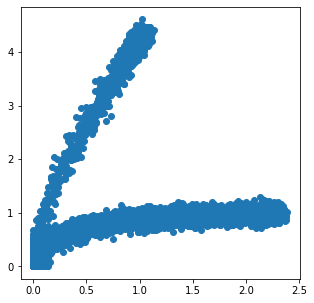

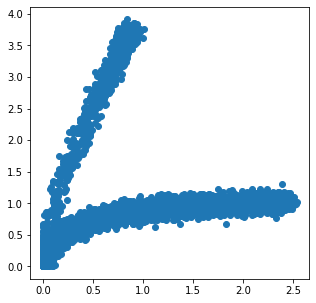

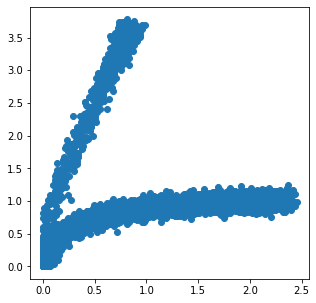

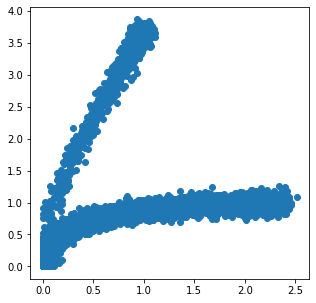

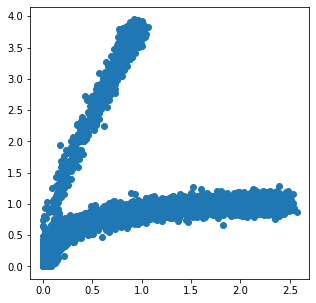

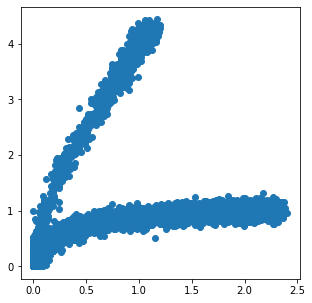

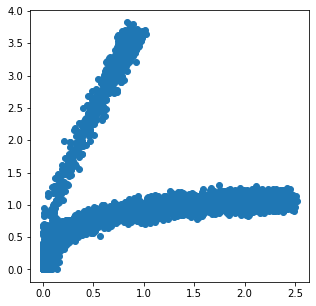

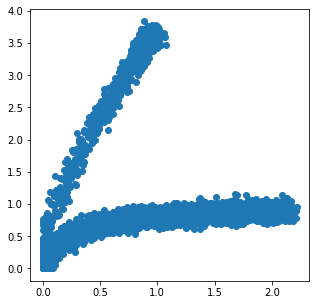

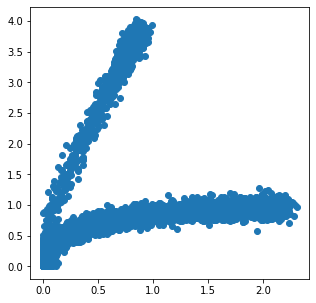

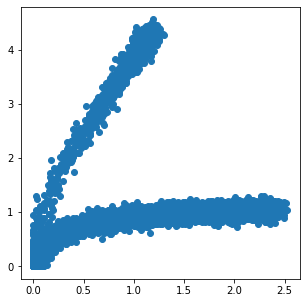

In [13]:
df=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data0606_for_publication/multi_path/raw/multi_path_Path1Upper_(1000)__R0.2.csv')
gene_list=list(df.gene_name.drop_duplicates())
for gene in gene_list:
    plt.figure(figsize=(5,5))
    onegene=df[df.gene_name==gene]
    plt.scatter(onegene.splice,onegene.unsplice)
    plt.show()

In [27]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
#srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding

save_path=None
df=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data0606_for_publication/multi_path/raw/multi_path_Path1Upper_(1000)__R0.8.csv')
loss_df, cellDancer_df=velocity(df,\
                             # max_epoches=max_epoches,\
                             # check_val_every_n_epoch=check_val_every_n_epoch,\
                             # patience=patience,\
                             # permutation_ratio=permutation_ratio,\
                             # speed_up=speed_up,\
                             # norm_u_s=norm_u_s,\
                             # norm_cell_distribution=norm_cell_distribution,\
                             n_jobs=6,\
                             save_path=save_path)
cellDancer_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/SIM_sl/cell_dancer_velocity_2022-06-07 15-10-24 as the output path.
Arranging genes for parallel job.
10  genes were arranged to  2  portions.



Velocity Estimation: 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]                                                                                                                                         
                                                                                                                                                                                                           

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,simulation8,0.113982,0.020651,0.263044,0.054039,0.104901,3.352977,0.292741,0.019387,0,NaN,0.015806,0.000000
1,1,simulation8,0.000000,0.055680,0.160611,0.052689,0.084520,3.377722,0.280576,0.019387,1,NaN,0.025356,0.000000
2,2,simulation8,0.090107,0.000000,0.244653,0.027315,0.102250,3.353650,0.294183,0.019387,2,NaN,0.074402,0.018121
3,3,simulation8,0.048873,0.072567,0.199501,0.083557,0.090677,3.372378,0.281266,0.019387,3,NaN,0.052905,0.019097
4,4,simulation8,0.192436,0.000000,0.338948,0.058021,0.121539,3.335577,0.300805,0.019387,4,NaN,0.000000,0.011762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,2245,simulation6,1.048060,2.317292,1.025375,2.581478,0.241726,3.726381,0.074906,0.019671,2245,NaN,0.956944,2.541013
22496,2246,simulation6,0.961248,2.374715,0.906404,2.616130,0.205136,3.738706,0.070642,0.019671,2246,NaN,1.193388,2.527320
22497,2247,simulation6,0.926353,2.338483,0.864115,2.570083,0.192977,3.739839,0.071431,0.019671,2247,NaN,1.011256,2.576859
22498,2248,simulation6,0.993548,2.275803,0.952647,2.524919,0.219461,3.729264,0.075540,0.019671,2248,NaN,1.102540,2.644339


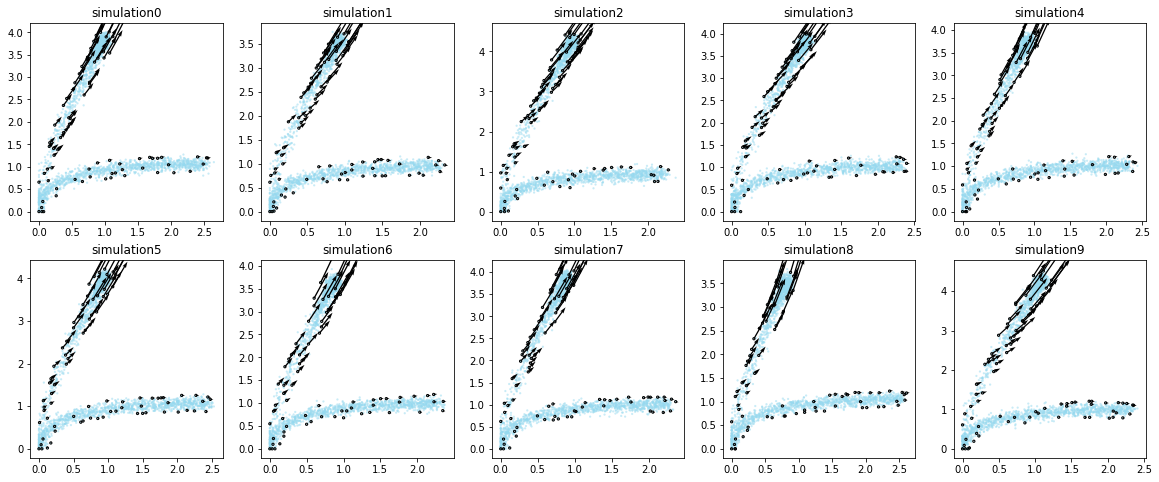

In [28]:
%autoreload 2

gene_list=list(df.gene_name.drop_duplicates())[0:10]

ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    # ax.axis('off')

plt.show()

# SIM - Wings

In [100]:
##################################
########## - SIM - Wings #########
##################################
def SIM_wing_path():
    s_list=[70,80]
    u_list=[10,15]
    alpha_list=[]
    gamma_list=[]
    for s_value in s_list:
        for u_value in u_list:
            alpha=u_value
            gamma=u_value/s_value
            alpha_list.append(alpha)
            gamma_list.append(gamma)

    s_list2=[100,110]
    u_list2=[30,40]
    alpha2_list=[]
    gamma2_list=[]
    for s_value in s_list2:
        for u_value in u_list2:
            alpha=u_value
            gamma=u_value/s_value
            alpha2_list.append(alpha)
            gamma2_list.append(gamma)

        ############## generating win_path_sim
        def gen_wing_path_sim(path2_sample,ratio):

            
            genn_amt=50#1000

            alpha1_list=[5]*genn_amt#np.random.uniform(low=0.5, high=1.5, size=(genn_amt,))#[1]*genn_amt #
            alpha2_list=[10]*genn_amt#np.random.uniform(low=1.5, high=2.5, size=(genn_amt,))#[2]*genn_amt #
            beta1_list=[1]*genn_amt #np.random.uniform(low=0.9, high=1.1, size=(genn_amt,)) 
            beta2_list=[1]*genn_amt #np.random.uniform(low=0.9, high=1.1, size=(genn_amt,)) 
            gamma1_list=[0.5]*genn_amt #np.random.uniform(low=min(gamma_list), high=min(gamma_list), size=(genn_amt,))
            gamma2_list=[0.5]*genn_amt #np.random.uniform(low=min(gamma2_list), high=min(gamma2_list), size=(genn_amt,))
            path1_pct_list=[99.999]*genn_amt#np.random.uniform(low=100, high=100, size=(genn_amt,))
            path2_pct_list=[80]*genn_amt#np.random.uniform(low=100, high=100, size=(genn_amt,))

            i=0
            data_df=pd.DataFrame()
            for alpha1,alpha2,beta1,beta2,gamma1,gamma2,path1_pct,path2_pct in zip(alpha1_list,alpha2_list,beta1_list,beta2_list,gamma1_list,gamma2_list,path1_pct_list,path2_pct_list):
                data = generate_onepath(gene_num=1, alpha1=alpha1, alpha2=alpha2, beta1=beta1, beta2=beta2, gamma1=gamma1, gamma2=gamma2, path1_pct=path1_pct, path2_pct=path2_pct, path1_sample=int(path2_sample/ratio), path2_sample=path2_sample, noise_level=0.2)
                data.gene_list = 'simulation'+str(i)
                data_df=data_df.append(data)
                # plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
                # plt.title('alpha('+str(alpha1)+','+str(alpha2)+')_beta('+str(beta1)+','+str(beta2)+')_gamma('+str(gamma1)+','+str(gamma2)+')_pathpct('+str(path1_pct)+','+str(path2_pct)+')')
                # plt.axis('scaled')
                # plt.show()
                i=i+1
                # print(i)
            data_df.to_csv(('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data0606_for_publication/wing_path/raw/wing_path_Path2Upper_'+str(path2_sample)+'__R'+str(ratio)+'.csv'),index=False)

        ratio_list=[1]#[0.2,0.4,0.6]
        path2_sample=1000#1000 #from (0,0) # 
        for ratio in ratio_list:
            # print(ratio)
            gen_wing_path_sim(path2_sample,ratio)
SIM_wing_path()
##################################
########## END - SIM - Wings #####
##################################

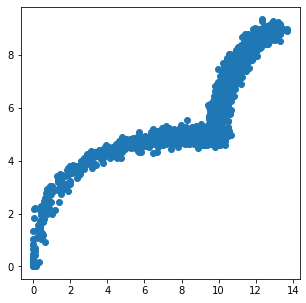

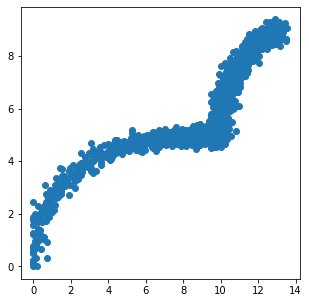

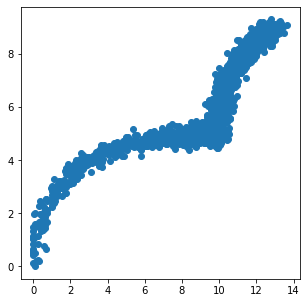

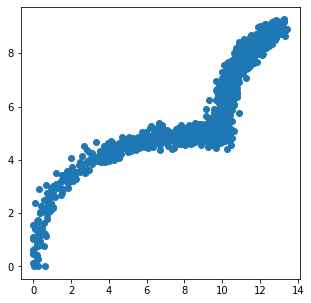

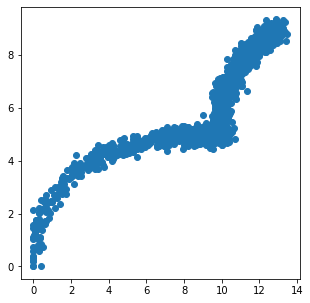

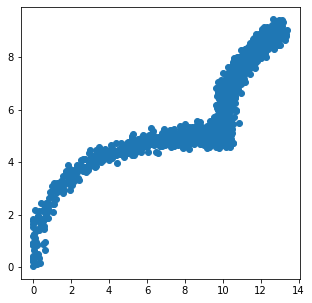

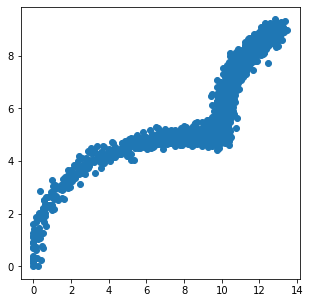

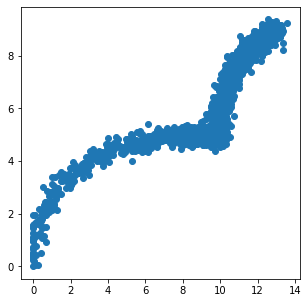

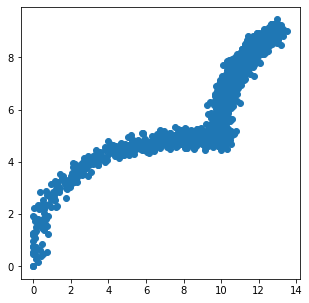

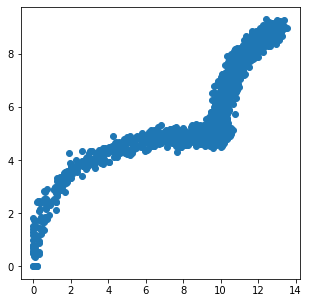

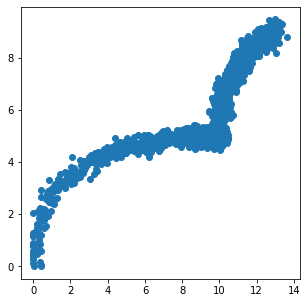

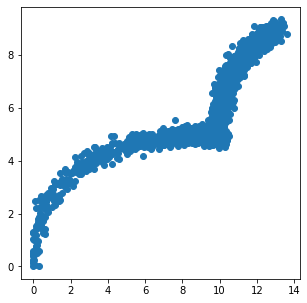

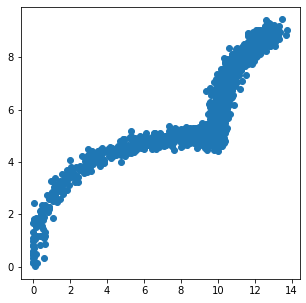

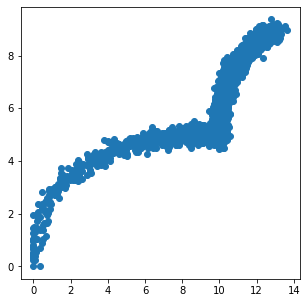

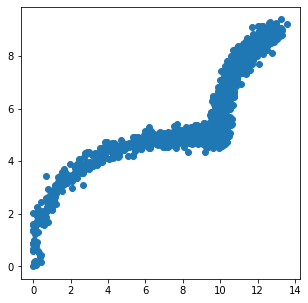

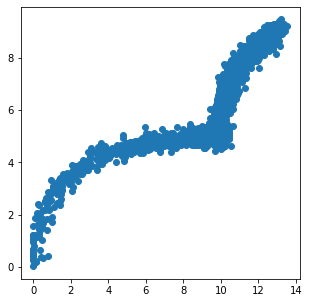

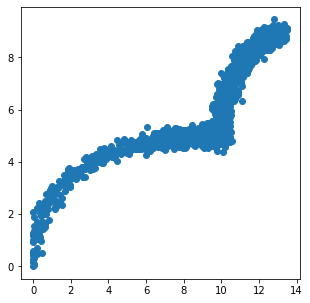

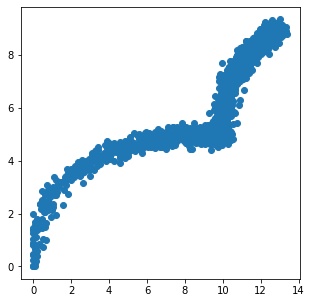

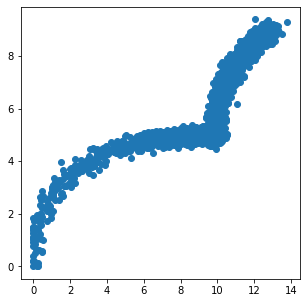

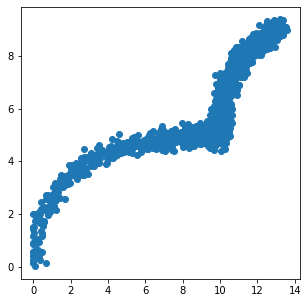

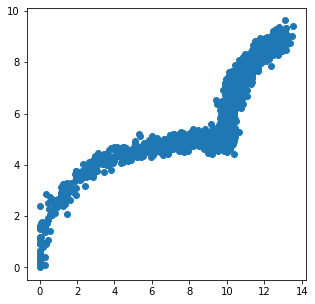

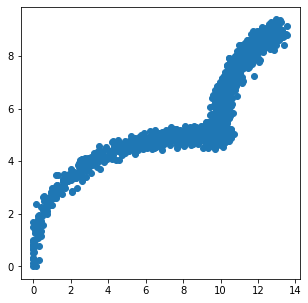

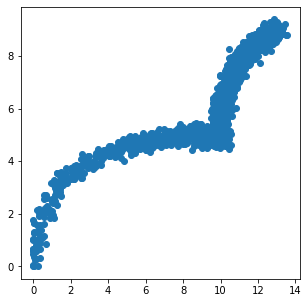

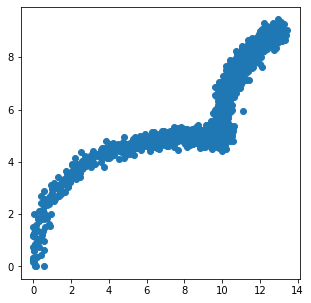

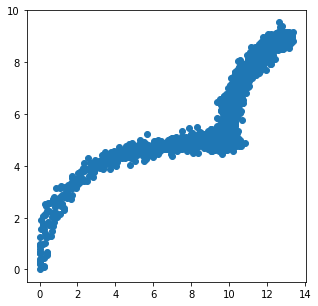

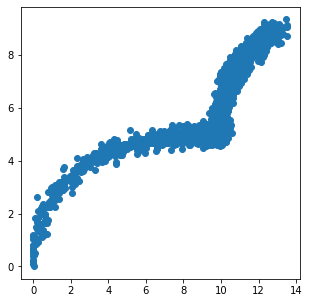

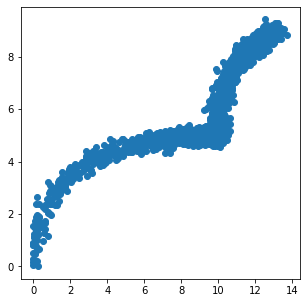

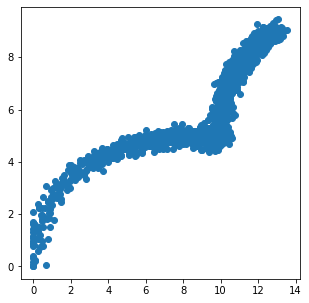

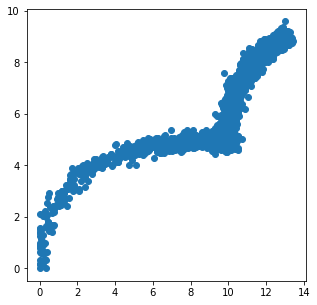

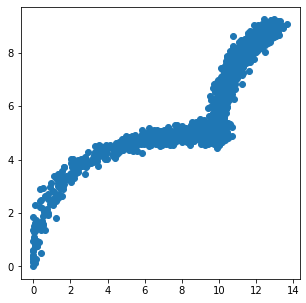

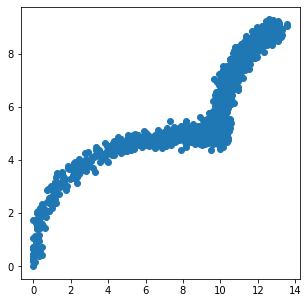

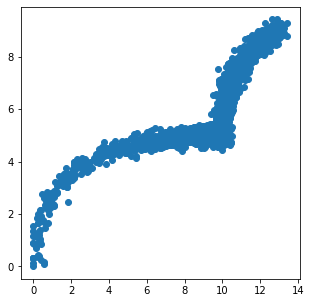

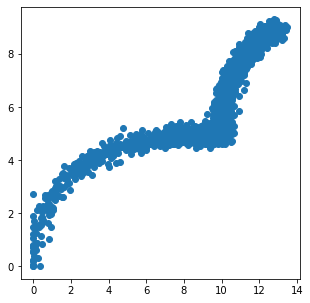

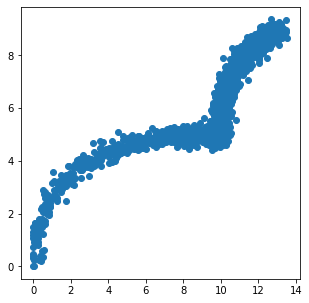

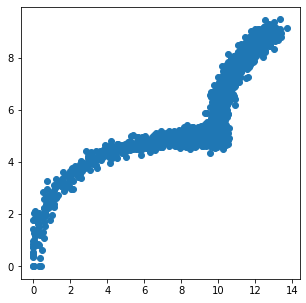

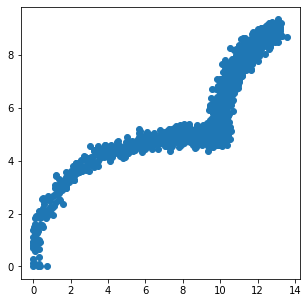

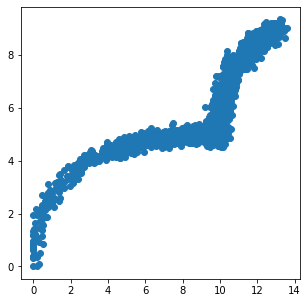

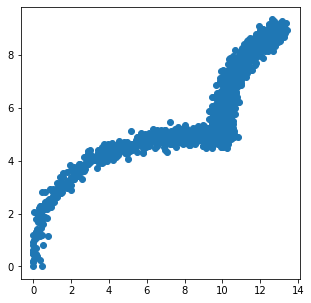

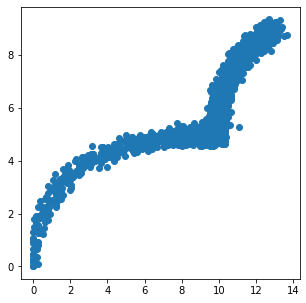

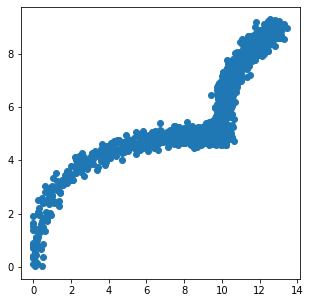

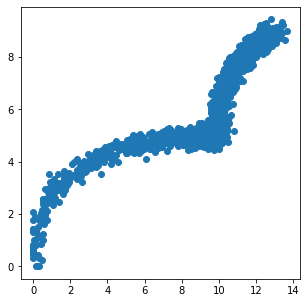

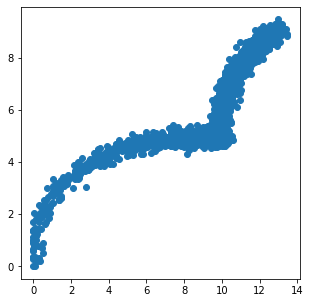

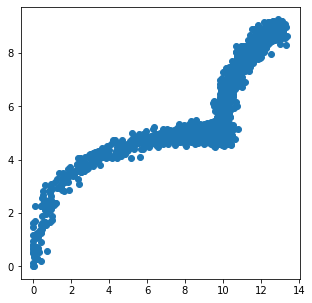

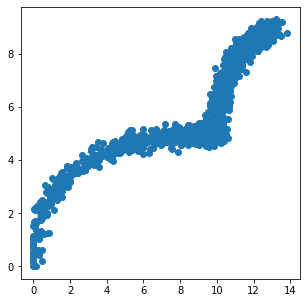

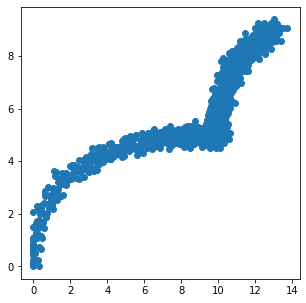

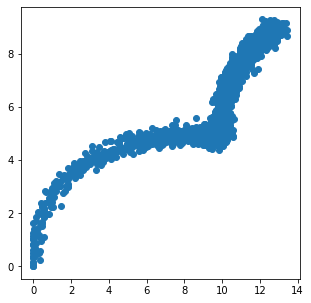

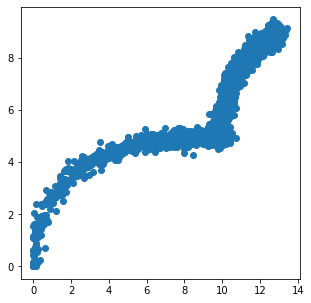

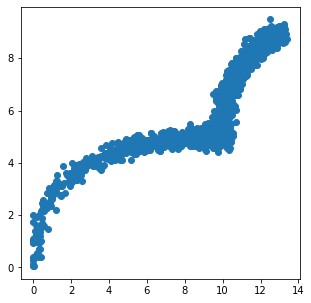

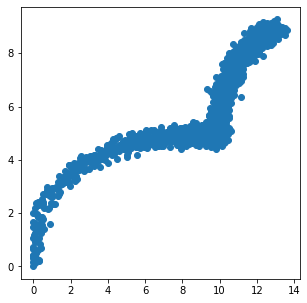

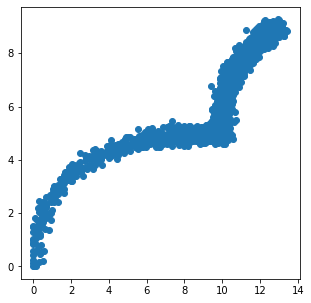

In [101]:
df=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/simulation/data0606_for_publication/wing_path/raw/wing_path_Path2Upper_1000__R1.csv')
gene_list=list(df.gene_list.drop_duplicates())
for gene in gene_list:
    plt.figure(figsize=(5,5))
    onegene=df[df.gene_list==gene]
    plt.scatter(onegene.s0,onegene.u0)
    plt.show()

In [81]:
df=df.rename(columns={"u0": "unsplice", "s0": "splice","gene_list": "gene_name"})
df.loc[:,'cellID']=list(range(2000))*50
df.loc[:,'clusters']=None
df

,gene_name,unsplice,splice,embedding1,embedding2,alpha,beta,gamma,path1_pct,path2_pct,cellID,clusters
0,simulation0,0.000000,1.960510,0.000000,1.960510,11.0,1.0,0.125,99.999,99.999,0,None
1,simulation0,0.123038,0.000000,0.123038,0.000000,11.0,1.0,0.125,99.999,99.999,1,None
2,simulation0,0.000000,0.044821,0.000000,0.044821,11.0,1.0,0.125,99.999,99.999,2,None
3,simulation0,0.133597,0.000000,0.133597,0.000000,11.0,1.0,0.125,99.999,99.999,3,None
4,simulation0,0.000000,0.000000,0.000000,0.000000,11.0,1.0,0.125,99.999,99.999,4,None
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,simulation49,30.960875,105.997770,30.960875,105.997770,30.0,1.0,0.273,99.999,99.999,1995,None
99996,simulation49,29.269659,107.688610,29.269659,107.688610,30.0,1.0,0.273,99.999,99.999,1996,None
99997,simulation49,29.869005,105.336740,29.869005,105.336740,30.0,1.0,0.273,99.999,99.999,1997,None
99998,simulation49,29.785328,109.074020,29.785328,109.074020,30.0,1.0,0.273,99.999,99.999,1998,None


In [82]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
#srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding
save_path=None
loss_df, cellDancer_df=velocity(df,\
                             # max_epoches=max_epoches,\
                             # check_val_every_n_epoch=check_val_every_n_epoch,\
                             # patience=patience,\
                             # permutation_ratio=permutation_ratio,\
                             # speed_up=speed_up,\
                             # norm_u_s=norm_u_s,\
                             # norm_cell_distribution=norm_cell_distribution,\
                             n_jobs=8,\
                             save_path=save_path)
cellDancer_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/SIM_sl/cell_dancer_velocity_2022-06-07 13-55-06 as the output path.
Arranging genes for parallel job.
50  genes were arranged to  7  portions.



Velocity Estimation: 100%|██████████| 7/7 [00:42<00:00,  5.16s/it]                                                                                                                                         
                                                                                                                                                                                                           

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,simulation15,0.540753,0.000000,2.972650,0.831540,0.167960,27.977646,16.483046,0.078650,0,None,0.000000,1.960510
1,1,simulation15,0.842194,1.563589,3.179168,2.743047,0.170342,27.988228,16.500372,0.078650,1,None,0.123038,0.000000
2,2,simulation15,0.000000,4.745582,2.316591,4.393802,0.145737,28.089907,16.471462,0.078650,2,None,0.000000,0.044821
3,3,simulation15,0.000000,0.895282,2.458689,0.828956,0.154677,28.023432,16.461527,0.078650,3,None,0.133597,0.000000
4,4,simulation15,0.000000,0.000000,2.492971,0.000000,0.156833,28.007812,16.459242,0.078650,4,None,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1995,simulation18,30.058838,104.999250,32.493710,140.603000,0.954844,27.673380,20.921423,0.059592,1995,None,30.290632,101.354095
99996,1996,simulation18,30.908669,110.029785,32.548573,146.530910,0.929914,27.732592,20.957989,0.059592,1996,None,30.512247,105.080160
99997,1997,simulation18,29.612762,109.411390,32.166170,143.926770,0.950276,27.672955,20.933586,0.059592,1997,None,29.802635,107.832130
99998,1998,simulation18,29.812695,105.237460,32.414993,140.432050,0.958364,27.662672,20.918040,0.059592,1998,None,29.281015,107.174300


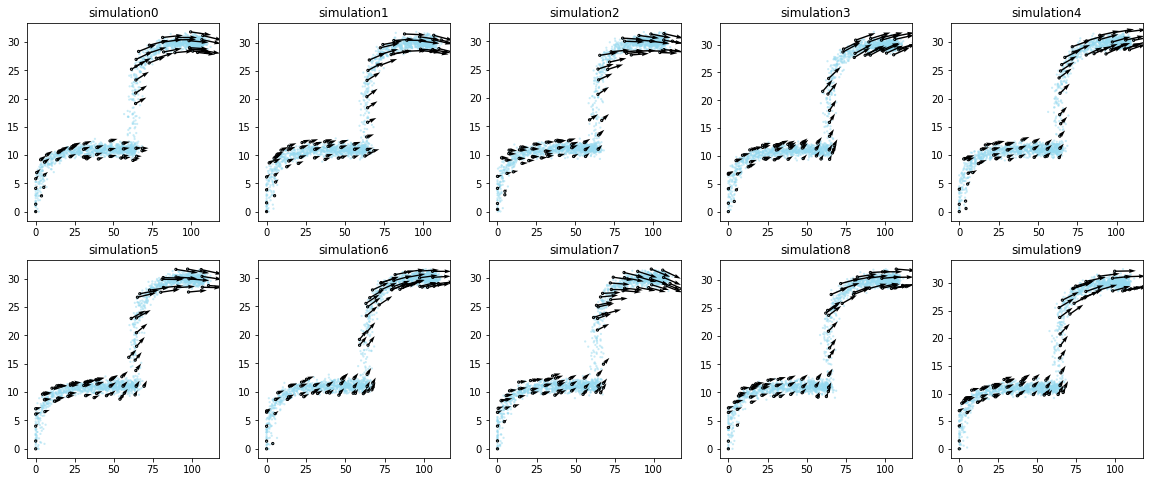

In [83]:
%autoreload 2

gene_list=list(df.gene_name.drop_duplicates())[0:10]

ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    # ax.axis('off')

plt.show()

/Users/shengyuli/anaconda3/envs/celldancer_env/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


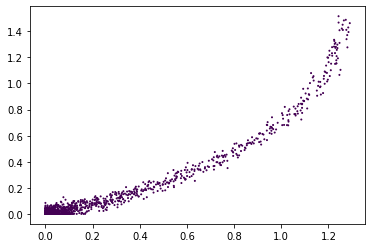

In [ ]:
#backward
data = generate_backward(gene_num=6, alpha=15, beta=10, gamma=12, sample=1000, noise_level=0.2)
data_g1 = data[data['gene_list']=="simulation000"]
plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
plt.show()

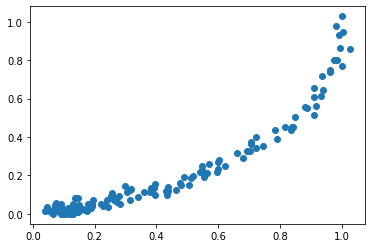

In [8]:
test=generate_backward(1, 2, 3, 4, 5, 6, 2, 2, 66, 66)
plt.scatter(test.s0,test.u0)

/Users/shengyuli/anaconda3/envs/celldancer_env/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


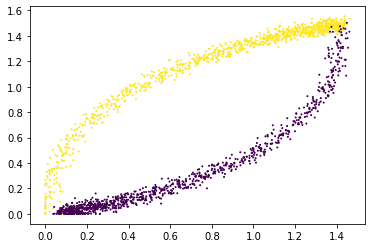

In [ ]:
    #circle: including normal, early switch, and early stop
    data = generate_onepath(gene_num=6, alpha1=15, alpha2=0, beta1=10, beta2=10, gamma1=10, gamma2=10, path1_pct=99, path2_pct=99, path1_sample=1000, path2_sample=1000, noise_level=0.2)
    data_g1 = data[data['gene_list']=="simulation000"]
    plt.scatter(data_g1['s0'], data_g1['u0'], c=data_g1['alpha'], s=1)
    plt.show()

In [ ]:
data_g1

,gene_list,u0,s0,embedding1,embedding2,alpha,beta,gamma,path1_pct,path2_pct
0,simulation000,0.022301,0.000000,0.022301,0.000000,15.0,10.0,12.0,99,99
1,simulation000,0.000000,0.011566,0.000000,0.011566,15.0,10.0,12.0,99,99
2,simulation000,0.000000,0.000000,0.000000,0.000000,15.0,10.0,12.0,99,99
3,simulation000,0.016786,0.016008,0.016786,0.016008,15.0,10.0,12.0,99,99
4,simulation000,0.038812,0.020743,0.038812,0.020743,15.0,10.0,12.0,99,99
...,...,...,...,...,...,...,...,...,...,...
1995,simulation000,0.031603,0.028822,0.031603,0.028822,0.0,3.0,4.0,99,99
1996,simulation000,0.047539,0.027537,0.047539,0.027537,0.0,3.0,4.0,99,99
1997,simulation000,0.000000,0.040979,0.000000,0.040979,0.0,3.0,4.0,99,99
1998,simulation000,0.036139,0.058328,0.036139,0.058328,0.0,3.0,4.0,99,99


In [4]:
df=generate_boost_path(gene_num=6, alpha1=15, alpha2=14, beta1=10, beta2=10, gamma1=10, gamma2=10, path1_pct=99, path2_pct=99, path1_sample=1000, path2_sample=1000, noise_level=0.2)

/Users/shengyuli/anaconda3/envs/celldancer_env/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


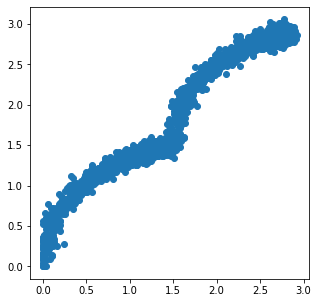

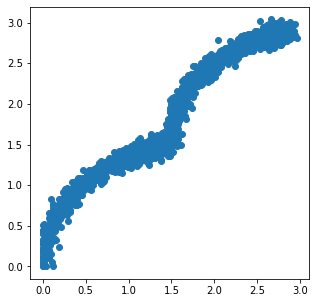

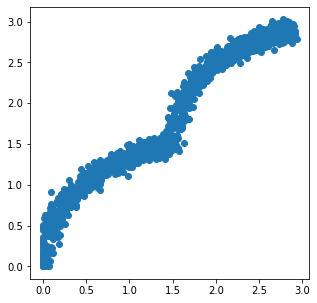

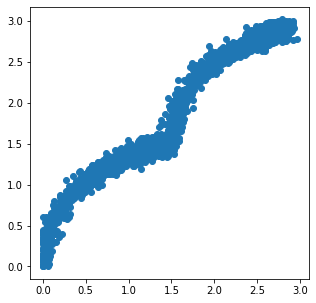

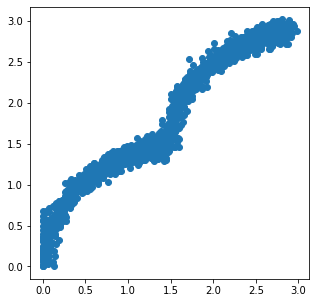

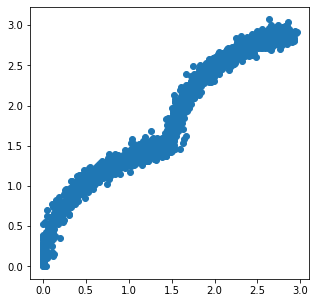

In [5]:
gene_list=list(df.gene_list.drop_duplicates())
for gene in gene_list:
    plt.figure(figsize=(5,5))
    onegene=df[df.gene_list==gene]
    plt.scatter(onegene.s0,onegene.u0)
    plt.show()